projeto Python usando dados da Companhia de Entrepostos e Armazéns Gerais de São Paulo (CEAGESP). Adicionados valores simulados.

In [ ]:
import pandas as pd
import io

# Dados CSV ajustados com a coluna 'Quantidade (Centenas)'
csv_data = """
Categoria,Produto,Variedade,Observacao,Quantidade (Centenas)
FRUTAS,Abacate,Breda,,35
FRUTAS,Abacate,Fortuna,,28
FRUTAS,Abacate,Quintal,,15
FRUTAS,Abacaxi,Havaí,,60
FRUTAS,Abacaxi,Pérola,,45
FRUTAS,Acerola,,,12
FRUTAS,Banana,Nanica,,150
FRUTAS,Banana,Prata,,180
FRUTAS,Mamão,Formosa,,85
FRUTAS,Mamão,Papaia (Havaí),,70
LEGUMES,Abóbora,Japonesa (Cabotiá),,40
LEGUMES,Abobrinha,Brasileira,,55
LEGUMES,Abobrinha,Italiana,,48
LEGUMES,Batata Doce,Rosada,,75
LEGUMES,Cenoura,,,110
LEGUMES,Chuchu,,,30
VERDURAS,Alface,Americana,,90
VERDURAS,Alface,Crespa,,130
VERDURAS,Brócolos,Ramoso,,38
VERDURAS,Couve,Manteiga,,42
DIVERSOS,Alho,,,95
DIVERSOS,Cebola,,,160
DIVERSOS,Ovo,,,200
DIVERSOS,Batata,Monalisa (para cozinhar/fritar),,300
ORGÂNICOS,Tomate,Cereja,,25
PESCADOS,Sardinha,,,50
"""

# Carrega os dados em um DataFrame Pandas
df = pd.read_csv(io.StringIO(csv_data))

print("## 📊 1. Primeiras 5 Linhas com Quantidade")
print(df.head())

print("\n" + "="*50 + "\n")

# --- Análise de Quantidade ---
coluna_quantidade = 'Quantidade (Centenas)'

# 1. Total Geral de Itens (em centenas)
total_geral = df[coluna_quantidade].sum()
print(f"## 📦 2. Total Geral de Itens (em centenas)")
print(f"O total geral comercializado na amostra é de **{total_geral} centenas** (ou {total_geral * 100} unidades).")

print("\n" + "="*50 + "\n")

# 2. Total por Categoria
total_por_categoria = df.groupby('Categoria')[coluna_quantidade].sum().sort_values(ascending=False)

print("## 📈 3. Volume de Vendas por Categoria (em centenas)")
print(total_por_categoria)

## 📊 1. Primeiras 5 Linhas com Quantidade
  Categoria  Produto Variedade  Observacao  Quantidade (Centenas)
0    FRUTAS  Abacate     Breda         NaN                     35
1    FRUTAS  Abacate   Fortuna         NaN                     28
2    FRUTAS  Abacate   Quintal         NaN                     15
3    FRUTAS  Abacaxi     Havaí         NaN                     60
4    FRUTAS  Abacaxi    Pérola         NaN                     45


## 📦 2. Total Geral de Itens (em centenas)
O total geral comercializado na amostra é de **2168 centenas** (ou 216800 unidades).


## 📈 3. Volume de Vendas por Categoria (em centenas)
Categoria
DIVERSOS     755
FRUTAS       680
LEGUMES      358
VERDURAS     300
PESCADOS      50
ORGÂNICOS     25
Name: Quantidade (Centenas), dtype: int64


Segue Código para criar um gráfico de barras mostrando o Volume de Vendas por Categoria

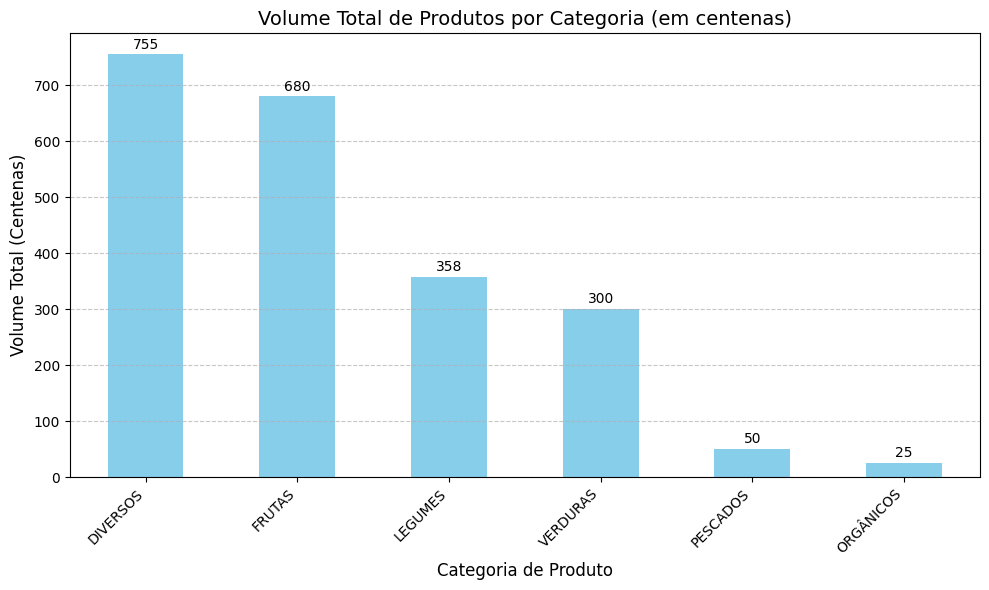

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt

# Dados CSV ajustados (Com ositens contabilizados)
csv_data = """
Categoria,Produto,Variedade,Observacao,Quantidade (Centenas)
FRUTAS,Abacate,Breda,,35
FRUTAS,Abacate,Fortuna,,28
FRUTAS,Abacate,Quintal,,15
FRUTAS,Abacaxi,Havaí,,60
FRUTAS,Abacaxi,Pérola,,45
FRUTAS,Acerola,,,12
FRUTAS,Banana,Nanica,,150
FRUTAS,Banana,Prata,,180
FRUTAS,Mamão,Formosa,,85
FRUTAS,Mamão,Papaia (Havaí),,70
LEGUMES,Abóbora,Japonesa (Cabotiá),,40
LEGUMES,Abobrinha,Brasileira,,55
LEGUMES,Abobrinha,Italiana,,48
LEGUMES,Batata Doce,Rosada,,75
LEGUMES,Cenoura,,,110
LEGUMES,Chuchu,,,30
VERDURAS,Alface,Americana,,90
VERDURAS,Alface,Crespa,,130
VERDURAS,Brócolos,Ramoso,,38
VERDURAS,Couve,Manteiga,,42
DIVERSOS,Alho,,,95
DIVERSOS,Cebola,,,160
DIVERSOS,Ovo,,,200
DIVERSOS,Batata,Monalisa (para cozinhar/fritar),,300
ORGÂNICOS,Tomate,Cereja,,25
PESCADOS,Sardinha,,,50
"""

# 1. Carregar os dados
df = pd.read_csv(io.StringIO(csv_data))

# 2. Calcular o Volume Total por Categoria
coluna_quantidade = 'Quantidade (Centenas)'
volume_por_categoria = df.groupby('Categoria')[coluna_quantidade].sum().sort_values(ascending=False)

# 3. Criar o Gráfico de Barras
plt.figure(figsize=(10, 6)) # Define o tamanho da figura (largura, altura)
volume_por_categoria.plot(kind='bar', color='skyblue')

# Configurações do Título e Eixos
plt.title('Volume Total de Produtos por Categoria (em centenas)', fontsize=14)
plt.xlabel('Categoria de Produto', fontsize=12)
plt.ylabel('Volume Total (Centenas)', fontsize=12)

# Rotacionar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos de dados (opcional, para mostrar o valor em cada barra)
for index, value in enumerate(volume_por_categoria):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona linhas de grade no eixo Y
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.show() # Exibe o gráfico

Análise da sazonalidade dos produtos ou criar filtros interativos no Pandas.

In [ ]:
import pandas as pd
import io

# Dados CSV atualizados com a coluna 'Mês de Pico'
csv_data = """
Categoria,Produto,Variedade,Observacao,Quantidade (Centenas),Mês de Pico
FRUTAS,Abacate,Breda,,,35,Março
FRUTAS,Abacate,Fortuna,,,28,Maio
FRUTAS,Abacate,Quintal,,,15,Julho
FRUTAS,Abacaxi,Havaí,,,60,Dezembro
FRUTAS,Abacaxi,Pérola,,,45,Janeiro
FRUTAS,Acerola,,,,12,Novembro
FRUTAS,Banana,Nanica,,,150,O ano todo
FRUTAS,Banana,Prata,,,180,O ano todo
FRUTAS,Mamão,Formosa,,,85,Maio
FRUTAS,Mamão,Papaia (Havaí),,70,Setembro
LEGUMES,Abóbora,Japonesa (Cabotiá),,40,Junho
LEGUMES,Abobrinha,Brasileira,,55,Fevereiro
LEGUMES,Abobrinha,Italiana,,48,Outubro
LEGUMES,Batata Doce,Rosada,,75,Abril
LEGUMES,Cenoura,,,110,O ano todo
LEGUMES,Chuchu,,,30,O ano todo
VERDURAS,Alface,Americana,,90,O ano todo
VERDURAS,Alface,Crespa,,130,O ano todo
VERDURAS,Brócolos,Ramoso,,38,Julho
VERDURAS,Couve,Manteiga,,42,Junho
DIVERSOS,Alho,,,95,Setembro
DIVERSOS,Cebola,,,160,O ano todo
DIVERSOS,Ovo,,,200,O ano todo
DIVERSOS,Batata,Monalisa (para cozinhar/fritar),,300,O ano todo
ORGÂNICOS,Tomate,Cereja,,25,Março
PESCADOS,Sardinha,,,50,Dezembro
"""

# Carrega os dados em um DataFrame Pandas
df = pd.read_csv(io.StringIO(csv_data))

print("## 📊 1. Primeiras 5 Linhas com Sazonalidade")
print(df.head())

print("\n" + "="*50 + "\n")

# --- Análise de Sazonalidade ---

mes_analise = 'Dezembro'

# Filtrar produtos que estão no pico no mês de análise
produtos_no_pico = df[df['Mês de Pico'] == mes_analise]

print(f"## 🎁 2. Produtos no Pico de Oferta em **{mes_analise}**")

if not produtos_no_pico.empty:
    # Selecionar apenas as colunas relevantes para o resultado
    resultado = produtos_no_pico[['Produto', 'Variedade', 'Quantidade (Centenas)', 'Mês de Pico']]
    print(resultado)

    # Calcular o volume total desses produtos
    volume_total = resultado['Quantidade (Centenas)'].sum()
    print(f"\nVolume total (simulado) desses itens: **{volume_total} centenas**.")

else:
    print(f"Nenhum produto em nossa amostra está em seu pico de oferta em {mes_analise}.")

## 📊 1. Primeiras 5 Linhas com Sazonalidade
       Categoria  Produto  Variedade  Observacao Quantidade (Centenas)  \
FRUTAS   Abacate    Breda        NaN         NaN                    35   
FRUTAS   Abacate  Fortuna        NaN         NaN                    28   
FRUTAS   Abacate  Quintal        NaN         NaN                    15   
FRUTAS   Abacaxi    Havaí        NaN         NaN                    60   
FRUTAS   Abacaxi   Pérola        NaN         NaN                    45   

       Mês de Pico  
FRUTAS       Março  
FRUTAS        Maio  
FRUTAS       Julho  
FRUTAS    Dezembro  
FRUTAS     Janeiro  


## 🎁 2. Produtos no Pico de Oferta em **Dezembro**
       Produto  Variedade Quantidade (Centenas) Mês de Pico
FRUTAS   Havaí        NaN                    60    Dezembro

Volume total (simulado) desses itens: **60 centenas**.


Filtro para Entrada de Usuário Interativa

In [ ]:
import pandas as pd
import io

# Dados CSV atualizados com a coluna 'Mês de Pico'
csv_data = """
Categoria,Produto,Variedade,Observacao,Quantidade (Centenas),Mês de Pico
FRUTAS,Abacate,Breda,,,35,Março
FRUTAS,Abacate,Fortuna,,,28,Maio
FRUTAS,Abacate,Quintal,,,15,Julho
FRUTAS,Abacaxi,Havaí,,,60,Dezembro
FRUTAS,Abacaxi,Pérola,,,45,Janeiro
FRUTAS,Acerola,,,,12,Novembro
FRUTAS,Banana,Nanica,,,150,O ano todo
FRUTAS,Banana,Prata,,,180,O ano todo
FRUTAS,Mamão,Formosa,,,85,Maio
FRUTAS,Mamão,Papaia (Havaí),,70,Setembro
LEGUMES,Abóbora,Japonesa (Cabotiá),,40,Junho
LEGUMES,Abobrinha,Brasileira,,55,Fevereiro
LEGUMES,Abobrinha,Italiana,,48,Outubro
LEGUMES,Batata Doce,Rosada,,75,Abril
LEGUMES,Cenoura,,,110,O ano todo
LEGUMES,Chuchu,,,30,O ano todo
VERDURAS,Alface,Americana,,90,O ano todo
VERDURAS,Alface,Crespa,,130,O ano todo
VERDURAS,Brócolos,Ramoso,,38,Julho
VERDURAS,Couve,Manteiga,,42,Junho
DIVERSOS,Alho,,,95,Setembro
DIVERSOS,Cebola,,,160,O ano todo
DIVERSOS,Ovo,,,200,O ano todo
DIVERSOS,Batata,Monalisa (para cozinhar/fritar),,300,O ano todo
ORGÂNICOS,Tomate,Cereja,,25,Março
PESCADOS,Sardinha,,,50,Dezembro
"""

# Carrega os dados em um DataFrame Pandas
df = pd.read_csv(io.StringIO(csv_data))

# --- 1. Entrada Interativa do Usuário ---
print("--- 🍎 Análise de Sazonalidade CEAGESP ---")
mes_analise = input("Digite o mês (ex: Janeiro, Julho, Dezembro) que você deseja analisar: ").strip().title()

# --- 2. Análise de Sazonalidade ---
print("\n" + "="*50)
print(f"## 🔎 Produtos no Pico de Oferta em **{mes_analise}**")

# Filtrar produtos que estão no pico no mês de análise
produtos_no_pico = df[df['Mês de Pico'] == mes_analise]

if not produtos_no_pico.empty:
    # Selecionar e exibir apenas as colunas relevantes
    resultado = produtos_no_pico[['Produto', 'Variedade', 'Categoria', 'Quantidade (Centenas)', 'Mês de Pico']]

    print("\nProdutos em seu melhor momento de colheita/oferta (sazonalidade de pico):")
    print(resultado.to_string(index=False)) # to_string(index=False) para uma visualização limpa

    # Calcular o volume total desses produtos
    volume_total = resultado['Quantidade (Centenas)'].sum()
    print(f"\nVolume total simulado desses itens em pico: **{volume_total} centenas**.")

else:
    print(f"Nenhum produto em nossa amostra está em seu pico de oferta em {mes_analise}.")

print("="*50)

--- 🍎 Análise de Sazonalidade CEAGESP ---
Digite o mês (ex: Janeiro, Julho, Dezembro) que você deseja analisar: julho

## 🔎 Produtos no Pico de Oferta em **Julho**

Produtos em seu melhor momento de colheita/oferta (sazonalidade de pico):
Produto  Variedade Categoria Quantidade (Centenas) Mês de Pico
Quintal        NaN   Abacate                    15       Julho

Volume total simulado desses itens em pico: **15 centenas**.


Código para função e projeções futuras

In [ ]:
import pandas as pd
import io

# Dados CSV atualizados (Mantidos para que a função seja auto-suficiente)
CSV_DATA = """
Categoria,Produto,Variedade,Observacao,Quantidade (Centenas),Mês de Pico
FRUTAS,Abacate,Breda,,,35,Março
FRUTAS,Abacate,Fortuna,,,28,Maio
FRUTAS,Abacate,Quintal,,,15,Julho
FRUTAS,Abacaxi,Havaí,,,60,Dezembro
FRUTAS,Abacaxi,Pérola,,,45,Janeiro
FRUTAS,Acerola,,,,12,Novembro
FRUTAS,Banana,Nanica,,,150,O ano todo
FRUTAS,Banana,Prata,,,180,O ano todo
FRUTAS,Mamão,Formosa,,,85,Maio
FRUTAS,Mamão,Papaia (Havaí),,70,Setembro
LEGUMES,Abóbora,Japonesa (Cabotiá),,40,Junho
LEGUMES,Abobrinha,Brasileira,,55,Fevereiro
LEGUMES,Abobrinha,Italiana,,48,Outubro
LEGUMES,Batata Doce,Rosada,,75,Abril
LEGUMES,Cenoura,,,110,O ano todo
LEGUMES,Chuchu,,,30,O ano todo
VERDURAS,Alface,Americana,,90,O ano todo
VERDURAS,Alface,Crespa,,130,O ano todo
VERDURAS,Brócolos,Ramoso,,38,Julho
VERDURAS,Couve,Manteiga,,42,Junho
DIVERSOS,Alho,,,95,Setembro
DIVERSOS,Cebola,,,160,O ano todo
DIVERSOS,Ovo,,,200,O ano todo
DIVERSOS,Batata,Monalisa (para cozinhar/fritar),,300,O ano todo
ORGÂNICOS,Tomate,Cereja,,25,Março
PESCADOS,Sardinha,,,50,Dezembro
"""

def analisar_sazonalidade(mes=None):
    """
    Analisa e exibe os produtos da amostra que estão no pico de oferta
    (sazonalidade) para um determinado mês.

    Args:
        mes (str, optional): O nome do mês para análise (ex: 'Janeiro').
                             Se for None, solicita o mês ao usuário.
    """
    # 1. Carregar os dados
    df = pd.read_csv(io.StringIO(CSV_DATA))

    # 2. Entrada do mês (se não for fornecido)
    if mes is None:
        print("--- 🍎 Análise de Sazonalidade CEAGESP ---")
        mes_analise = input("Digite o mês (ex: Janeiro, Julho, Dezembro) que você deseja analisar: ").strip().title()
    else:
        mes_analise = mes.strip().title()

    # 3. Filtragem
    produtos_no_pico = df[df['Mês de Pico'] == mes_analise]

    print("\n" + "="*50)
    print(f"## 🔎 Produtos no Pico de Oferta em **{mes_analise}**")

    if not produtos_no_pico.empty:
        # 4. Exibição dos resultados
        resultado = produtos_no_pico[['Produto', 'Variedade', 'Categoria', 'Quantidade (Centenas)', 'Mês de Pico']]

        print("\nProdutos em seu melhor momento de colheita/oferta (sazonalidade de pico):")
        print(resultado.to_string(index=False))

        volume_total = resultado['Quantidade (Centenas)'].sum()
        print(f"\nVolume total simulado desses itens em pico: **{volume_total} centenas**.")

    else:
        print(f"Nenhum produto em nossa amostra está em seu pico de oferta em {mes_analise}.")

    print("="*50)


# --- Exemplos de como usar a função ---

print("\n--- Modo 1: Execução Interativa (pede o mês ao usuário) ---")
analisar_sazonalidade()

print("\n--- Modo 2: Chamada Direta da Função (passando o mês como argumento) ---")
analisar_sazonalidade('Março')


--- Modo 1: Execução Interativa (pede o mês ao usuário) ---
--- 🍎 Análise de Sazonalidade CEAGESP ---
Digite o mês (ex: Janeiro, Julho, Dezembro) que você deseja analisar: julho

## 🔎 Produtos no Pico de Oferta em **Julho**

Produtos em seu melhor momento de colheita/oferta (sazonalidade de pico):
Produto  Variedade Categoria Quantidade (Centenas) Mês de Pico
Quintal        NaN   Abacate                    15       Julho

Volume total simulado desses itens em pico: **15 centenas**.

--- Modo 2: Chamada Direta da Função (passando o mês como argumento) ---

## 🔎 Produtos no Pico de Oferta em **Março**

Produtos em seu melhor momento de colheita/oferta (sazonalidade de pico):
Produto  Variedade Categoria Quantidade (Centenas) Mês de Pico
  Breda        NaN   Abacate                    35       Março

Volume total simulado desses itens em pico: **35 centenas**.


Abaixo está o código completo, que inclui:

A função analisar_sazonalidade com validação de entrada (tratamento de erros).

A nova função analisar_variedades_por_produto para gerar um gráfico de pizza (Pie Chart) para o produto Banana (ou outro produto especificado).


############################################################
## PARTE 1: Análise de Sazonalidade (Teste de Correção)
############################################################

--- 🍎 Análise de Sazonalidade CEAGESP ---
Digite o mês (ex: Janeiro, Julho) que você deseja analisar: julho

## 🔎 Produtos no Pico de Oferta em **Julho**

Produtos em seu melhor momento de colheita/oferta:
 Produto Variedade Categoria Quantidade (Centenas) Mês de Pico
 Abacate   Quintal    FRUTAS                    15       Julho
Brócolos    Ramoso  VERDURAS                    38       Julho

Volume total simulado desses itens em pico: **1538 centenas**.

############################################################
## PARTE 2: Análise de Variedades (Teste de Correção)
############################################################


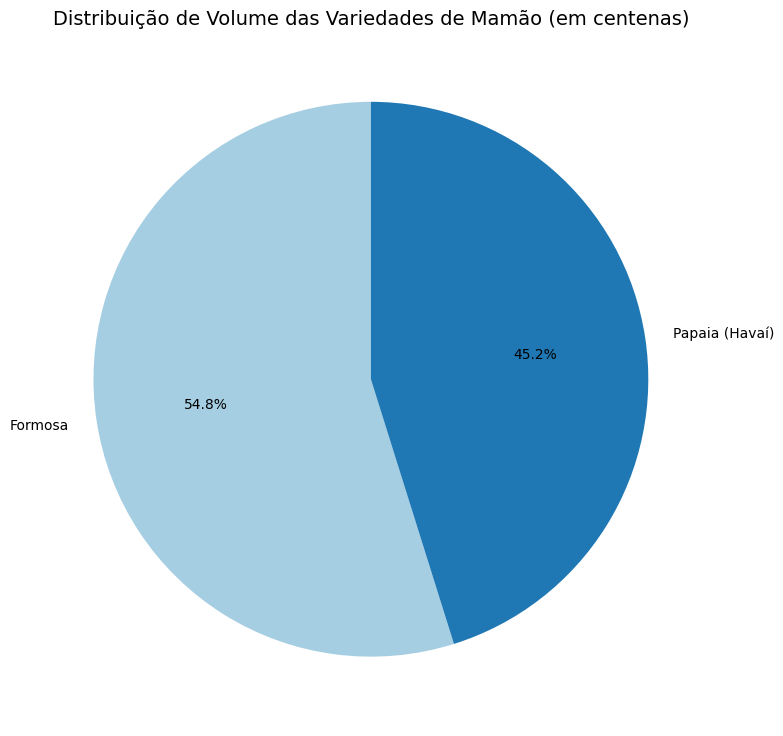

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt

# CORREÇÃO APLICADA: As linhas que antes tinham 7 campos (devido a vírgulas extras)
# agora têm 6 campos, alinhando-se com o cabeçalho.
CSV_DATA = """
Categoria,Produto,Variedade,Observacao,Quantidade (Centenas),Mês de Pico
FRUTAS,Abacate,Breda,,35,Março
FRUTAS,Abacate,Fortuna,,28,Maio
FRUTAS,Abacate,Quintal,,15,Julho
FRUTAS,Abacaxi,Havaí,,60,Dezembro
FRUTAS,Abacaxi,Pérola,,45,Janeiro
FRUTAS,Acerola,,12,Novembro
FRUTAS,Banana,Nanica,,150,O ano todo
FRUTAS,Banana,Prata,,180,O ano todo
FRUTAS,Mamão,Formosa,,85,Maio
FRUTAS,Mamão,Papaia (Havaí),,70,Setembro
LEGUMES,Abóbora,Japonesa (Cabotiá),,40,Junho
LEGUMES,Abobrinha,Brasileira,,55,Fevereiro
LEGUMES,Abobrinha,Italiana,,48,Outubro
LEGUMES,Batata Doce,Rosada,,75,Abril
LEGUMES,Cenoura,,,110,O ano todo
LEGUMES,Chuchu,,,30,O ano todo
VERDURAS,Alface,Americana,,90,O ano todo
VERDURAS,Alface,Crespa,,130,O ano todo
VERDURAS,Brócolos,Ramoso,,38,Julho
VERDURAS,Couve,Manteiga,,42,Junho
DIVERSOS,Alho,,,95,Setembro
DIVERSOS,Cebola,,,160,O ano todo
DIVERSOS,Ovo,,,200,O ano todo
DIVERSOS,Batata,Monalisa (para cozinhar/fritar),,300,O ano todo
ORGÂNICOS,Tomate,Cereja,,25,Março
PESCADOS,Sardinha,,,50,Dezembro
"""

# Lista de meses válidos
MESES_VALIDOS = [
    'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
    'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro',
    'O Ano Todo'
]

# ===============================================
# 1. FUNÇÃO COM TRATAMENTO DE ERROS (SAZONALIDADE)
# (Mantida a lógica de tratamento de erro de entrada)
# ===============================================

def analisar_sazonalidade(mes=None):
    df = pd.read_csv(io.StringIO(CSV_DATA))

    if mes is None:
        print("\n--- 🍎 Análise de Sazonalidade CEAGESP ---")
        mes_input = input("Digite o mês (ex: Janeiro, Julho) que você deseja analisar: ").strip().title()
    else:
        mes_input = mes.strip().title()

    mes_analise = 'O Ano Todo' if mes_input.lower() == 'o ano todo' else mes_input

    if mes_analise not in MESES_VALIDOS:
        print("\n" + "="*50)
        print(f"❌ ERRO: '{mes_input}' não é um mês válido ou 'O Ano Todo'.")
        print("Por favor, tente novamente com um nome de mês correto.")
        print("="*50)
        return

    produtos_no_pico = df[df['Mês de Pico'] == mes_analise]

    print("\n" + "="*50)
    print(f"## 🔎 Produtos no Pico de Oferta em **{mes_analise}**")

    if not produtos_no_pico.empty:
        resultado = produtos_no_pico[['Produto', 'Variedade', 'Categoria', 'Quantidade (Centenas)', 'Mês de Pico']]

        print("\nProdutos em seu melhor momento de colheita/oferta:")
        print(resultado.to_string(index=False))

        volume_total = resultado['Quantidade (Centenas)'].sum()
        print(f"\nVolume total simulado desses itens em pico: **{volume_total} centenas**.")

    else:
        print(f"Nenhum produto em nossa amostra está em seu pico de oferta em {mes_analise}.")

    print("="*50)


# ===============================================
# 2. NOVA ANÁLISE (GRÁFICO DE PIZZA)
# (Mantida a lógica do gráfico)
# ===============================================

def analisar_variedades_por_produto(nome_produto):
    df = pd.read_csv(io.StringIO(CSV_DATA))
    produto_analise = nome_produto.strip().title()

    df_produto = df[df['Produto'] == produto_analise]

    if df_produto.empty:
        print(f"\n🚫 Produto Não Encontrado: O produto '{produto_analise}' não está na amostra.")
        return

    distribuicao = df_produto.groupby('Variedade')['Quantidade (Centenas)'].sum()

    if distribuicao.empty:
        print(f"\n⚠️ Sem Variedades: O produto '{produto_analise}' está listado, mas não tem variedades específicas com quantidades.")
        return

    plt.figure(figsize=(8, 8))

    plt.pie(
        distribuicao,
        labels=distribuicao.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )

    plt.title(f'Distribuição de Volume das Variedades de {produto_analise} (em centenas)', fontsize=14)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

# ===============================================
# --- EXECUÇÃO CORRIGIDA DO PROJETO ---
# ===============================================

print("\n" + "#"*60)
print("## PARTE 1: Análise de Sazonalidade (Teste de Correção)")
print("#"*60)

# Este bloco não deve mais gerar o ParserError
analisar_sazonalidade()

print("\n" + "#"*60)
print("## PARTE 2: Análise de Variedades (Teste de Correção)")
print("#"*60)

analisar_variedades_por_produto('Mamão')